In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 통계 분석 패키지
from scipy import stats
import scipy.stats

from scipy.stats import shapiro # 정규성 검증
from statsmodels.formula.api import ols # 회귀분석
# proportion test 패키지
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency #카이제곱 검정
from scipy.stats import bartlett

# 주성분 분석
from sklearn.decomposition import PCA
# 회귀분석
import statsmodels.api as sm

# linkage: 계층형 군집분석, dendrogram: 계층구조 나무, cluster: linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# 군집 방법 : AgglomerativeClustering(계층형), KMeans(k-평균), DBSCAN
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# 실루엣(Silhouette) 계수 산출
from sklearn.metrics import silhouette_samples, silhouette_score
# 실루엣 계수 산출 및 시각화 라이브러리 (pip install yellowbrick 실행)
from yellowbrick.cluster import SilhouetteVisualizer

# 데이터 전처리 : 항목 값에 대한 index 생성
from mlxtend.preprocessing import TransactionEncoder
# 지지도 계산
from mlxtend.frequent_patterns import apriori
# 연관 규칙
from mlxtend.frequent_patterns import association_rules

In [2]:
%matplotlib inline

#import matplotlib.pyplot as plt

# 맑은 고딕 적용
matplotlib.rc("font", family = "NaNumGothic")

# 음수 표시
# -값 표시
matplotlib.rc('axes', unicode_minus=False)

In [3]:
df_orders=pd.read_csv("./on_orders.csv", encoding="cp949")
df_orders

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
0,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M17-S0530-1024,33310,08JAN2021:06:24:00
1,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M21-S0540-1082,3780,08JAN2021:06:24:00
2,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M15-S0140-1311,22520,08JAN2021:06:24:00
3,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M12-S0350-1035,21630,08JAN2021:06:24:00
4,U10001,U10001-O2021-1003,14JAN21:16:50:14,L4-M12-S0640-1057,11700,15JAN2021:06:28:00
...,...,...,...,...,...,...
856618,U13000,U13000-O2023-1008,28DEC23:14:06:13,L4-M12-S0350-1063,11520,29DEC2023:04:23:00
856619,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M12-S0330-1011,18870,29DEC2023:04:23:00
856620,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M21-S0540-1161,3120,29DEC2023:04:23:00
856621,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M17-S0030-1016,37760,29DEC2023:04:23:00


In [4]:
df_items=pd.read_csv("./on_items.csv", encoding="cp949")
df_items

,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
0,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2021,15840,16130
1,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2022,17030,17340
2,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2023,17380,18640
3,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2022,14160,15350
4,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2023,15060,16160
...,...,...,...,...,...,...,...,...,...,...,...
10049,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L,2022,7180,7790
10050,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L,2021,6820,7320
10051,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수,2023,15890,17050
10052,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수,2022,14780,16370


In [5]:
df_users=pd.read_csv("./on_users.csv", encoding="cp949")
df_users

,idUser,Gender,Age,FamilyCount,MemberYN
0,U10001,여성,26,2,Y
1,U10002,남성,61,2,Y
2,U10003,여성,34,2,Y
3,U10004,남성,26,1,N
4,U10005,여성,33,3,Y
...,...,...,...,...,...
2995,U12996,여성,66,2,N
2996,U12997,남성,24,2,Y
2997,U12998,남성,31,2,Y
2998,U12999,여성,32,1,Y


In [6]:
# 'ItemCode'에서 "-"를 기준으로 분리하여 대분류 카테고리 추출
df_orders['Category'] = df_orders['ItemCode'].str.split('-').str[0]


In [7]:
# 대분류 카테고리별 매출액 계산
category_sales = df_orders.groupby('Category')['Price'].sum().reset_index()
category_sales = category_sales.rename(columns={'Price': 'TotalSales'})


In [8]:
# 대분류 카테고리별 주문건수 계산
category_orders = df_orders.groupby('Category')['idOrder'].nunique().reset_index()
category_orders = category_orders.rename(columns={'idOrder': 'OrderCount'})


In [9]:
# 전체 매출액과 주문건수 계산
total_sales = df_orders['Price'].sum()
total_orders = df_orders['idOrder'].nunique()

# 매출액 비중 계산
category_sales['SalesShare'] = category_sales['TotalSales'] / total_sales * 100

# 주문건수 비중 계산
category_orders['OrderShare'] = category_orders['OrderCount'] / total_orders * 100


In [10]:
# 매출액 비중 결과 확인
print(category_sales[['Category', 'TotalSales', 'SalesShare']])

# 주문건수 비중 결과 확인
print(category_orders[['Category', 'OrderCount', 'OrderShare']])


  Category  TotalSales  SalesShare
0       L1  5973815440   45.208876
1       L3    57355930    0.434060
2       L4  6956241580   52.643719
3       L5   226398170    1.713345
  Category  OrderCount  OrderShare
0       L1      162993   94.779903
1       L3        4222    2.455079
2       L4      166633   96.896552
3       L5       12432    7.229168


- 2022년 가공식품과 신선식품 상위 매출 카테고리 
- 2023년 가공식품과 신선식품 상위 매출 카테고리 

In [13]:
# 'OrderDT' 컬럼을 datetime 형식으로 변환
df_orders['OrderDT'] = pd.to_datetime(df_orders['OrderDT'], format='%d%b%y:%H:%M:%S')



In [14]:
# 2022년 데이터 필터링
df_orders_2022 = df_orders[df_orders['OrderDT'].dt.year == 2022]

# 2023년 데이터 필터링
df_orders_2023 = df_orders[df_orders['OrderDT'].dt.year == 2023]


In [15]:
# 'ItemCode'에서 대분류와 중분류 추출
df_orders['MainCategory'] = df_orders['ItemCode'].str.split('-').str[0]  # 대분류
df_orders['SubCategory'] = df_orders['ItemCode'].str.split('-').str[1]   # 중분류


In [ ]:
# 2022년 매출액 계산
category_sales_2022 = df_orders_2022_filtered.groupby('Category')['Price'].sum().reset_index()
category_sales_2022 = category_sales_2022.rename(columns={'Price': 'TotalSales'})

# 2023년 매출액 계산
category_sales_2023 = df_orders_2023_filtered.groupby('Category')['Price'].sum().reset_index()
category_sales_2023 = category_sales_2023.rename(columns={'Price': 'TotalSales'})


In [17]:
df_orders = df_orders.drop("Category", axis=1)

In [18]:
# 대분류 기준으로 '가공식품'과 '신선식품' 구분 (예시로 작성, 실제 규칙에 맞게 수정)
df_orders['ProductType'] = df_orders['MainCategory'].apply(
    lambda x: '가공식품' if x in ['L1', 'L4'] else ('신선식품' if x in ['L2', 'L3'] else '기타')
)


In [19]:
# 2022년과 2023년 데이터 필터링
df_orders_2022 = df_orders[df_orders['OrderDT'].dt.year == 2022]
df_orders_2023 = df_orders[df_orders['OrderDT'].dt.year == 2023]


In [21]:
# 2022년 매출액 계산 (ProductType과 SubCategory 기준으로)
category_sales_2022 = df_orders_2022.groupby(['ProductType', 'SubCategory'])['Price'].sum().reset_index()
category_sales_2022 = category_sales_2022.rename(columns={'Price': 'TotalSales'})

# 2023년 매출액 계산 (ProductType과 SubCategory 기준으로)
category_sales_2023 = df_orders_2023.groupby(['ProductType', 'SubCategory'])['Price'].sum().reset_index()
category_sales_2023 = category_sales_2023.rename(columns={'Price': 'TotalSales'})


In [22]:
# 2022년 상위 매출 카테고리 출력
top_categories_2022 = category_sales_2022.sort_values(by='TotalSales', ascending=False)
print("2022년 가공식품과 신선식품 상위 매출 카테고리:")
print(top_categories_2022)


2022년 가공식품과 신선식품 상위 매출 카테고리:
   ProductType SubCategory  TotalSales
1         가공식품         M12  1072672300
4         가공식품         M17   847697210
8         가공식품         M22   714361740
0         가공식품         M11   289679410
3         가공식품         M15   284473530
5         가공식품         M18   233117700
9         가공식품         M23   174152180
7         가공식품         M21   160382510
10        가공식품         M24   153283690
6         가공식품         M19   113925670
2         가공식품         M13    87958300
11          기타         M20    54839870
13        신선식품         M16    17489680
12          기타         M25    14889730


In [23]:
# 2023년 상위 매출 카테고리 출력
top_categories_2023 = category_sales_2023.sort_values(by='TotalSales', ascending=False)
print("2023년 가공식품과 신선식품 상위 매출 카테고리:")
print(top_categories_2023)


2023년 가공식품과 신선식품 상위 매출 카테고리:
   ProductType SubCategory  TotalSales
1         가공식품         M12  1480091590
4         가공식품         M17  1180382930
8         가공식품         M22   996735400
3         가공식품         M15   412426480
0         가공식품         M11   405794480
5         가공식품         M18   312860440
9         가공식품         M23   224077630
10        가공식품         M24   204323260
7         가공식품         M21   198820750
6         가공식품         M19   168180540
2         가공식품         M13   115223650
11          기타         M20    78983360
13        신선식품         M16    27759720
12          기타         M25    25681700


In [24]:
top_categories_2022

,ProductType,SubCategory,TotalSales
1,가공식품,M12,1072672300
4,가공식품,M17,847697210
8,가공식품,M22,714361740
0,가공식품,M11,289679410
3,가공식품,M15,284473530
5,가공식품,M18,233117700
9,가공식품,M23,174152180
7,가공식품,M21,160382510
10,가공식품,M24,153283690
6,가공식품,M19,113925670


In [25]:
top_categories_2023

,ProductType,SubCategory,TotalSales
1,가공식품,M12,1480091590
4,가공식품,M17,1180382930
8,가공식품,M22,996735400
3,가공식품,M15,412426480
0,가공식품,M11,405794480
5,가공식품,M18,312860440
9,가공식품,M23,224077630
10,가공식품,M24,204323260
7,가공식품,M21,198820750
6,가공식품,M19,168180540


In [29]:
df_orders_2022.groupby(['MainCategory','SubCategory'])['Price'].sum()

MainCategory  SubCategory
L1            M11            289679410
              M12            159752750
              M13             87958300
              M15            284473530
              M17            550118630
              M19            113925670
              M21            160382510
              M22             29970170
              M23             93008440
              M24            153283690
L3            M16             17489680
L4            M12            912919550
              M17            297578580
              M18            233117700
              M22            684391570
              M23             81143740
L5            M20             54839870
              M25             14889730
Name: Price, dtype: int64

In [30]:
# 'L1' 대분류만 필터링
df_orders_2022_L1 = df_orders_2022[df_orders_2022['MainCategory'] == 'L1']

# 'L4' 대분류만 필터링
df_orders_2022_L4 = df_orders_2022[df_orders_2022['MainCategory'] == 'L4']


In [31]:
# 'L1' 대분류에서 SubCategory별 매출액 계산
sales_L1 = df_orders_2022_L1.groupby('SubCategory')['Price'].sum().reset_index()

# 'L4' 대분류에서 SubCategory별 매출액 계산
sales_L4 = df_orders_2022_L4.groupby('SubCategory')['Price'].sum().reset_index()


In [36]:
# 'L1' 대분류 내에서 SubCategory를 매출액 기준으로 내림차순 정렬
top_sales_L1_2022 = sales_L1.sort_values(by='Price', ascending=False)

# 'L4' 대분류 내에서 SubCategory를 매출액 기준으로 내림차순 정렬
top_sales_L4_2022 = sales_L4.sort_values(by='Price', ascending=False)


In [33]:
# 결과 출력: 'L1' 대분류 상위 매출 SubCategory
print("L1 대분류 상위 매출 SubCategory:")
print(top_sales_L1)

# 결과 출력: 'L4' 대분류 상위 매출 SubCategory
print("L4 대분류 상위 매출 SubCategory:")
print(top_sales_L4)


L1 대분류 상위 매출 SubCategory:
  SubCategory      Price
4         M17  550118630
0         M11  289679410
3         M15  284473530
6         M21  160382510
1         M12  159752750
9         M24  153283690
5         M19  113925670
8         M23   93008440
2         M13   87958300
7         M22   29970170
L4 대분류 상위 매출 SubCategory:
  SubCategory      Price
0         M12  912919550
3         M22  684391570
1         M17  297578580
2         M18  233117700
4         M23   81143740


In [34]:
# 'L1' 대분류만 필터링 (2023년)
df_orders_2023_L1 = df_orders_2023[df_orders_2023['MainCategory'] == 'L1']

# 'L4' 대분류만 필터링 (2023년)
df_orders_2023_L4 = df_orders_2023[df_orders_2023['MainCategory'] == 'L4']

# 'L1' 대분류에서 SubCategory별 매출액 계산 (2023년)
sales_L1_2023 = df_orders_2023_L1.groupby('SubCategory')['Price'].sum().reset_index()

# 'L4' 대분류에서 SubCategory별 매출액 계산 (2023년)
sales_L4_2023 = df_orders_2023_L4.groupby('SubCategory')['Price'].sum().reset_index()

# 'L1' 대분류 내에서 SubCategory를 매출액 기준으로 내림차순 정렬 (2023년)
top_sales_L1_2023 = sales_L1_2023.sort_values(by='Price', ascending=False)

# 'L4' 대분류 내에서 SubCategory를 매출액 기준으로 내림차순 정렬 (2023년)
top_sales_L4_2023 = sales_L4_2023.sort_values(by='Price', ascending=False)

# 결과 출력: 2023년 L1 대분류 상위 매출 SubCategory
print("2023년 L1 대분류 상위 매출 SubCategory:")
print(top_sales_L1_2023)

# 결과 출력: 2023년 L4 대분류 상위 매출 SubCategory
print("2023년 L4 대분류 상위 매출 SubCategory:")
print(top_sales_L4_2023)


2023년 L1 대분류 상위 매출 SubCategory:
  SubCategory      Price
4         M17  757451380
3         M15  412426480
0         M11  405794480
1         M12  232366780
9         M24  204323260
6         M21  198820750
5         M19  168180540
8         M23  121683870
2         M13  115223650
7         M22   38267310
2023년 L4 대분류 상위 매출 SubCategory:
  SubCategory       Price
0         M12  1247724810
3         M22   958468090
1         M17   422931550
2         M18   312860440
4         M23   102393760


In [37]:
import pandas as pd

# 예시: 2022년 상위 매출 데이터를 준비한 상태 (이미 top_sales_L1_2022, top_sales_L4_2022, top_sales_L1_2023, top_sales_L4_2023 등의 데이터가 준비되었다고 가정)

# 2022년 L1 대분류 상위 매출 SubCategory
top_L1_2022 = top_sales_L1_2022['SubCategory'].tolist()

# 2022년 L4 대분류 상위 매출 SubCategory
top_L4_2022 = top_sales_L4_2022['SubCategory'].tolist()

# 2023년 L1 대분류 상위 매출 SubCategory
top_L1_2023 = top_sales_L1_2023['SubCategory'].tolist()

# 2023년 L4 대분류 상위 매출 SubCategory
top_L4_2023 = top_sales_L4_2023['SubCategory'].tolist()

# L1 대분류에서 공통 상위 매출 SubCategory 추출 (2022년과 2023년 공통)
common_L1 = list(set(top_L1_2022).intersection(set(top_L1_2023)))

# L4 대분류에서 공통 상위 매출 SubCategory 추출 (2022년과 2023년 공통)
common_L4 = list(set(top_L4_2022).intersection(set(top_L4_2023)))

# 결과 출력
print("L1 대분류에서 2022년과 2023년 공통 상위 매출 SubCategory:")
print(common_L1)

print("L4 대분류에서 2022년과 2023년 공통 상위 매출 SubCategory:")
print(common_L4)


L1 대분류에서 2022년과 2023년 공통 상위 매출 SubCategory:
['M15', 'M19', 'M12', 'M17', 'M22', 'M23', 'M21', 'M24', 'M11', 'M13']
L4 대분류에서 2022년과 2023년 공통 상위 매출 SubCategory:
['M12', 'M17', 'M22', 'M23', 'M18']


In [38]:
# 'df_items'에서 ItemMiddleCode와 ItemMiddleName을 딕셔너리로 변환
middle_category_dict = dict(zip(df_items['ItemMiddleCode'], df_items['ItemMiddleName']))

# common_L1과 common_L4의 SubCategory 코드가 ItemMiddleCode와 일치한다고 가정하고 변환
common_L1_names = [middle_category_dict.get(code, "알 수 없음") for code in common_L1]
common_L4_names = [middle_category_dict.get(code, "알 수 없음") for code in common_L4]

# 결과 출력
print("L1 대분류에서 2022년과 2023년 공통 상위 매출 SubCategory 이름:")
for code, name in zip(common_L1, common_L1_names):
    print(f"SubCategory 코드: {code}, 이름: {name}")

print("\nL4 대분류에서 2022년과 2023년 공통 상위 매출 SubCategory 이름:")
for code, name in zip(common_L4, common_L4_names):
    print(f"SubCategory 코드: {code}, 이름: {name}")


L1 대분류에서 2022년과 2023년 공통 상위 매출 SubCategory 이름:
SubCategory 코드: M15, 이름: 냉동
SubCategory 코드: M19, 이름: 양념
SubCategory 코드: M12, 이름: 과일
SubCategory 코드: M17, 이름: 수산
SubCategory 코드: M22, 이름: 채소
SubCategory 코드: M23, 이름: 축산
SubCategory 코드: M21, 이름: 즉석
SubCategory 코드: M24, 이름: 커피
SubCategory 코드: M11, 이름: 곡물
SubCategory 코드: M13, 이름: 과자

L4 대분류에서 2022년과 2023년 공통 상위 매출 SubCategory 이름:
SubCategory 코드: M12, 이름: 과일
SubCategory 코드: M17, 이름: 수산
SubCategory 코드: M22, 이름: 채소
SubCategory 코드: M23, 이름: 축산
SubCategory 코드: M18, 이름: 신선


In [39]:
df_orders

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,MainCategory,SubCategory,ProductType
0,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L4-M17-S0530-1024,33310,08JAN2021:06:24:00,L4,M17,가공식품
1,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L1-M21-S0540-1082,3780,08JAN2021:06:24:00,L1,M21,가공식품
2,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L1-M15-S0140-1311,22520,08JAN2021:06:24:00,L1,M15,가공식품
3,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L4-M12-S0350-1035,21630,08JAN2021:06:24:00,L4,M12,가공식품
4,U10001,U10001-O2021-1003,2021-01-14 16:50:14,L4-M12-S0640-1057,11700,15JAN2021:06:28:00,L4,M12,가공식품
...,...,...,...,...,...,...,...,...,...
856618,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L4-M12-S0350-1063,11520,29DEC2023:04:23:00,L4,M12,가공식품
856619,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M12-S0330-1011,18870,29DEC2023:04:23:00,L1,M12,가공식품
856620,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M21-S0540-1161,3120,29DEC2023:04:23:00,L1,M21,가공식품
856621,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M17-S0030-1016,37760,29DEC2023:04:23:00,L1,M17,가공식품


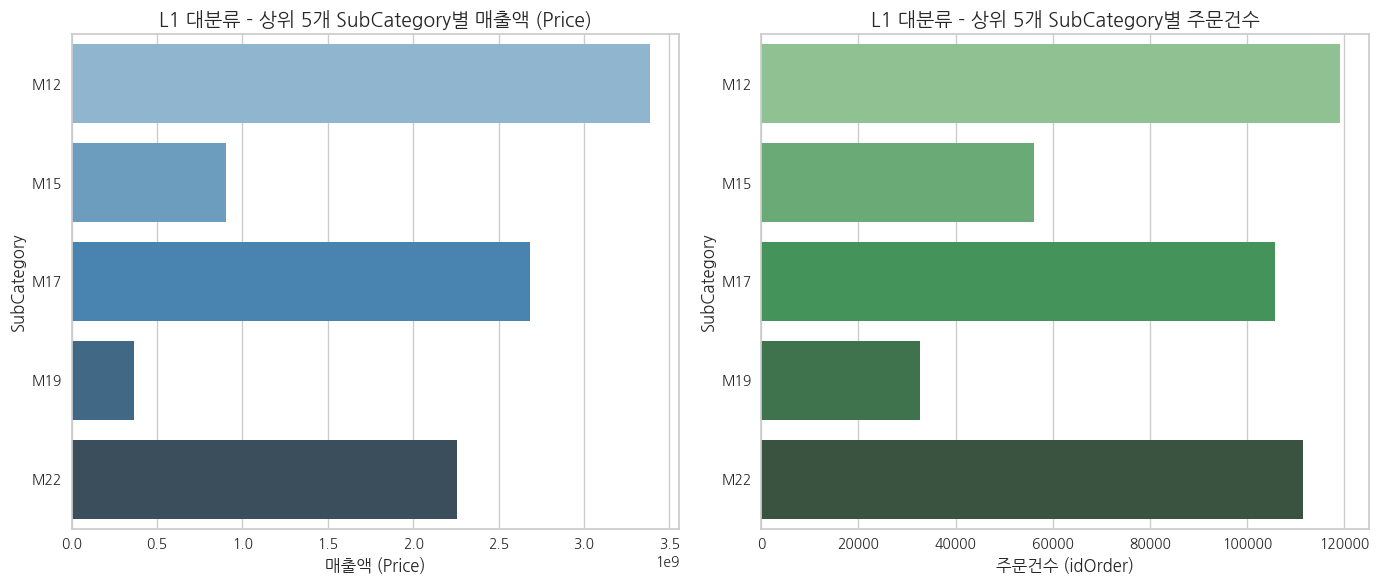

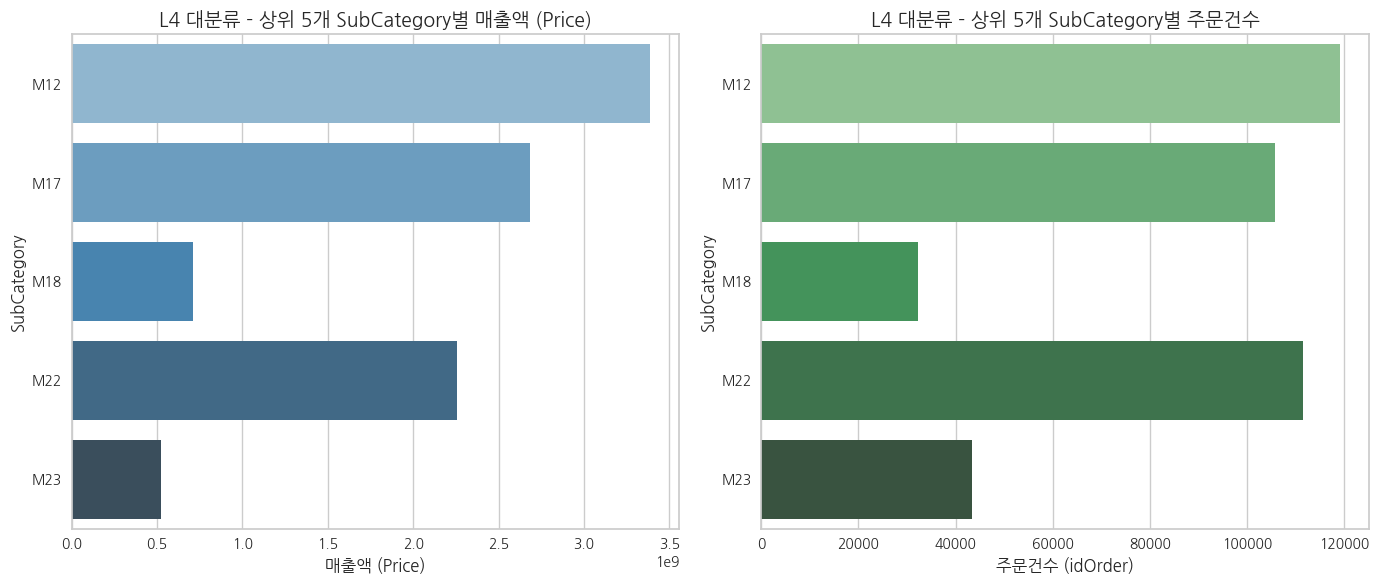

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상위 5개 SubCategory 추출
top_L1_5 = common_L1[:5]
top_L4_5 = common_L4[:5]

# df_orders에서 해당 SubCategory 필터링하여 Price와 idOrder 합산

# L1 대분류
df_L1_filtered = df_orders[df_orders['SubCategory'].isin(top_L1_5)]
L1_sales = df_L1_filtered.groupby('SubCategory').agg(
    total_price=('Price', 'sum'),
    total_orders=('idOrder', 'nunique')  # idOrder의 개수로 주문 건수 집계
).reset_index()

# L4 대분류
df_L4_filtered = df_orders[df_orders['SubCategory'].isin(top_L4_5)]
L4_sales = df_L4_filtered.groupby('SubCategory').agg(
    total_price=('Price', 'sum'),
    total_orders=('idOrder', 'nunique')  # idOrder의 개수로 주문 건수 집계
).reset_index()

# 시각화 - L1 대분류 Price와 idOrder
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# L1 대분류 - Price 막대 그래프
sns.barplot(x='total_price', y='SubCategory', data=L1_sales, ax=axes[0], palette='Blues_d')
axes[0].set_title('L1 대분류 - 상위 5개 SubCategory별 매출액 (Price)', fontsize=14)
axes[0].set_xlabel('매출액 (Price)', fontsize=12)
axes[0].set_ylabel('SubCategory', fontsize=12)

# L1 대분류 - 주문건수 막대 그래프
sns.barplot(x='total_orders', y='SubCategory', data=L1_sales, ax=axes[1], palette='Greens_d')
axes[1].set_title('L1 대분류 - 상위 5개 SubCategory별 주문건수', fontsize=14)
axes[1].set_xlabel('주문건수 (idOrder)', fontsize=12)
axes[1].set_ylabel('SubCategory', fontsize=12)

plt.tight_layout()
plt.show()

# 시각화 - L4 대분류 Price와 idOrder
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# L4 대분류 - Price 막대 그래프
sns.barplot(x='total_price', y='SubCategory', data=L4_sales, ax=axes[0], palette='Blues_d')
axes[0].set_title('L4 대분류 - 상위 5개 SubCategory별 매출액 (Price)', fontsize=14)
axes[0].set_xlabel('매출액 (Price)', fontsize=12)
axes[0].set_ylabel('SubCategory', fontsize=12)

# L4 대분류 - 주문건수 막대 그래프
sns.barplot(x='total_orders', y='SubCategory', data=L4_sales, ax=axes[1], palette='Greens_d')
axes[1].set_title('L4 대분류 - 상위 5개 SubCategory별 주문건수', fontsize=14)
axes[1].set_xlabel('주문건수 (idOrder)', fontsize=12)
axes[1].set_ylabel('SubCategory', fontsize=12)

plt.tight_layout()
plt.show()


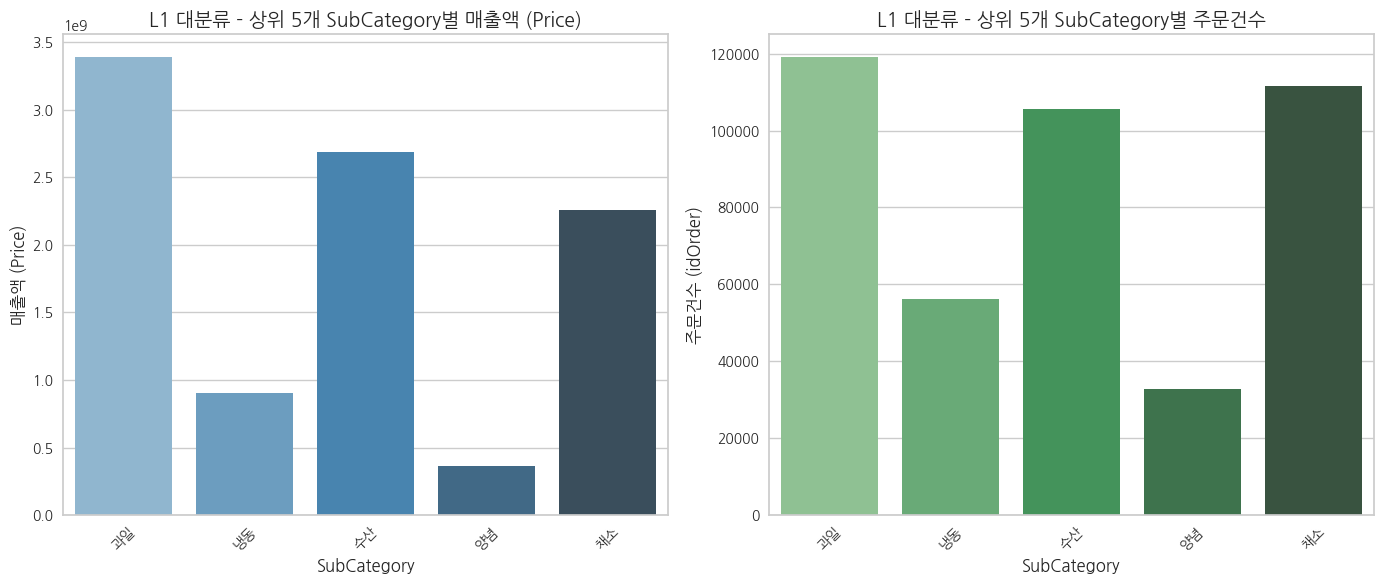

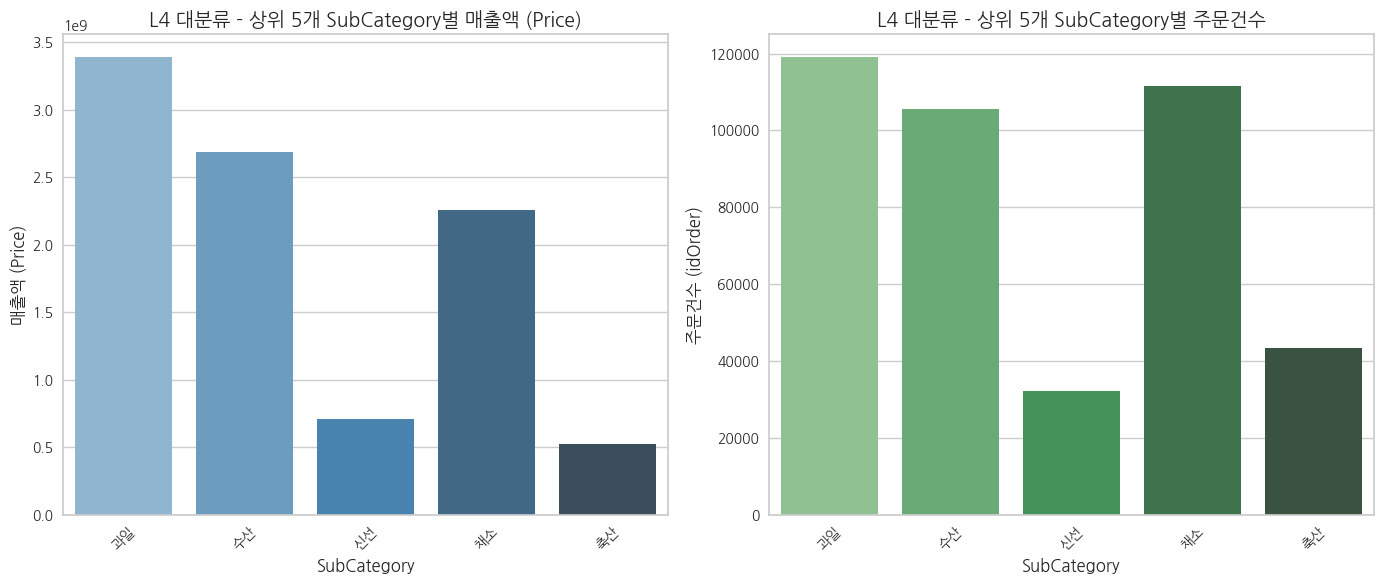

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SubCategory 코드와 이름을 매핑하는 딕셔너리 생성 (예시 데이터에 맞춰 업데이트)
sub_category_dict = {
    'M15': '냉동', 'M19': '양념', 'M12': '과일', 'M17': '수산', 'M22': '채소',
    'M23': '축산', 'M21': '즉석', 'M24': '커피', 'M11': '곡물', 'M13': '과자',
    'M18': '신선'
}

# 상위 5개 SubCategory 추출
top_L1_5 = common_L1[:5]
top_L4_5 = common_L4[:5]

# df_orders에서 해당 SubCategory 필터링하여 Price와 idOrder 합산

# L1 대분류
df_L1_filtered = df_orders[df_orders['SubCategory'].isin(top_L1_5)]
L1_sales = df_L1_filtered.groupby('SubCategory').agg(
    total_price=('Price', 'sum'),
    total_orders=('idOrder', 'nunique')  # idOrder의 개수로 주문 건수 집계
).reset_index()

# L4 대분류
df_L4_filtered = df_orders[df_orders['SubCategory'].isin(top_L4_5)]
L4_sales = df_L4_filtered.groupby('SubCategory').agg(
    total_price=('Price', 'sum'),
    total_orders=('idOrder', 'nunique')  # idOrder의 개수로 주문 건수 집계
).reset_index()

# SubCategory 코드 -> 이름으로 변환
L1_sales['SubCategory'] = L1_sales['SubCategory'].map(sub_category_dict)
L4_sales['SubCategory'] = L4_sales['SubCategory'].map(sub_category_dict)

# 시각화 - L1 대분류 Price와 idOrder (x축과 y축을 바꿈)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# L1 대분류 - Price 막대 그래프 (x축에 SubCategory 이름, y축에 Price 합계)
sns.barplot(x='SubCategory', y='total_price', data=L1_sales, ax=axes[0], palette='Blues_d')
axes[0].set_title('L1 대분류 - 상위 5개 SubCategory별 매출액 (Price)', fontsize=14)
axes[0].set_xlabel('SubCategory', fontsize=12)
axes[0].set_ylabel('매출액 (Price)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)  # x축 레이블 회전

# L1 대분류 - 주문건수 막대 그래프 (x축에 SubCategory 이름, y축에 idOrder 합계)
sns.barplot(x='SubCategory', y='total_orders', data=L1_sales, ax=axes[1], palette='Greens_d')
axes[1].set_title('L1 대분류 - 상위 5개 SubCategory별 주문건수', fontsize=14)
axes[1].set_xlabel('SubCategory', fontsize=12)
axes[1].set_ylabel('주문건수 (idOrder)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)  # x축 레이블 회전

plt.tight_layout()
plt.show()

# 시각화 - L4 대분류 Price와 idOrder (x축과 y축을 바꿈)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# L4 대분류 - Price 막대 그래프 (x축에 SubCategory 이름, y축에 Price 합계)
sns.barplot(x='SubCategory', y='total_price', data=L4_sales, ax=axes[0], palette='Blues_d')
axes[0].set_title('L4 대분류 - 상위 5개 SubCategory별 매출액 (Price)', fontsize=14)
axes[0].set_xlabel('SubCategory', fontsize=12)
axes[0].set_ylabel('매출액 (Price)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)  # x축 레이블 회전

# L4 대분류 - 주문건수 막대 그래프 (x축에 SubCategory 이름, y축에 idOrder 합계)
sns.barplot(x='SubCategory', y='total_orders', data=L4_sales, ax=axes[1], palette='Greens_d')
axes[1].set_title('L4 대분류 - 상위 5개 SubCategory별 주문건수', fontsize=14)
axes[1].set_xlabel('SubCategory', fontsize=12)
axes[1].set_ylabel('주문건수 (idOrder)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)  # x축 레이블 회전

plt.tight_layout()
plt.show()


In [42]:
df_orders.groupby("SubCategory")['Price'].sum()

SubCategory
M11     912214650
M12    3387320310
M13     258757780
M15     906827070
M16      57355930
M17    2682158550
M18     708770130
M19     364604140
M20     172786790
M21     455416560
M22    2256222810
M23     526405170
M24     471359850
M25      53611380
Name: Price, dtype: int64

In [43]:
L1_sales

,SubCategory,total_price,total_orders
0,과일,3387320310,119069
1,냉동,906827070,56187
2,수산,2682158550,105639
3,양념,364604140,32724
4,채소,2256222810,111606


In [44]:
L4_sales

,SubCategory,total_price,total_orders
0,과일,3387320310,119069
1,수산,2682158550,105639
2,신선,708770130,32229
3,채소,2256222810,111606
4,축산,526405170,43445


In [45]:
import pandas as pd

# OrderDT 컬럼을 날짜 형식으로 변환
df_orders['OrderDT'] = pd.to_datetime(df_orders['OrderDT'], format='%d%b%y:%H:%M:%S')

# 날짜별 주문건수 계산
daily_orders = df_orders.groupby(df_orders['OrderDT'].dt.date)['idOrder'].nunique()

# 하루 평균 주문건수 계산
average_daily_orders = daily_orders.mean()

print(f"하루 평균 주문건수: {average_daily_orders:.2f}")


하루 평균 주문건수: 158.94


OrderDT
2021-01-01    291
2021-01-03      9
2021-01-04    411
2021-01-05     78
2021-01-07    175
             ... 
2023-12-27    207
2023-12-28    206
2023-12-29    156
2023-12-30     14
2023-12-31    257
Name: idOrder, Length: 1082, dtype: int64

In [47]:
daily_orders

OrderDT
2021-01-01    291
2021-01-03      9
2021-01-04    411
2021-01-05     78
2021-01-07    175
             ... 
2023-12-27    207
2023-12-28    206
2023-12-29    156
2023-12-30     14
2023-12-31    257
Name: idOrder, Length: 1082, dtype: int64

In [48]:
# OrderDT 컬럼을 날짜 형식으로 변환
df_orders['OrderDT'] = pd.to_datetime(df_orders['OrderDT'], format='%d%b%y:%H:%M:%S')

# 2023년 데이터만 필터링
df_orders_2023 = df_orders[df_orders['OrderDT'].dt.year == 2023]

# 날짜별 주문건수 계산 (2023년만)
daily_orders_2023 = df_orders_2023.groupby(df_orders_2023['OrderDT'].dt.date)['idOrder'].nunique()

# 하루 평균 주문건수 계산 (2023년만)
average_daily_orders_2023 = daily_orders_2023.mean()

print(f"2023년 하루 평균 주문건수: {average_daily_orders_2023:.2f}")

2023년 하루 평균 주문건수: 172.13


In [49]:
df_orders_2023.groupby(df_orders_2023['OrderDT'].dt.date)['idOrder']

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,MainCategory,SubCategory,ProductType
240,U10001,U10001-O2023-1015,2023-01-10 21:10:57,L4-M12-S0430-1035,34690,12JAN2023:04:23:00,L4,M12,가공식품
241,U10001,U10001-O2023-1015,2023-01-10 21:10:57,L1-M24-S0600-1166,19130,12JAN2023:04:23:00,L1,M24,가공식품
242,U10001,U10001-O2023-1015,2023-01-10 21:10:57,L1-M12-S0200-1010,4620,12JAN2023:04:23:00,L1,M12,가공식품
243,U10001,U10001-O2023-1015,2023-01-10 21:10:57,L1-M13-S0440-1038,9170,12JAN2023:04:23:00,L1,M13,가공식품
244,U10001,U10001-O2023-1016,2023-01-24 18:32:40,L1-M15-S0140-1112,25950,25JAN2023:06:27:00,L1,M15,가공식품
...,...,...,...,...,...,...,...,...,...
856618,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L4-M12-S0350-1063,11520,29DEC2023:04:23:00,L4,M12,가공식품
856619,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M12-S0330-1011,18870,29DEC2023:04:23:00,L1,M12,가공식품
856620,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M21-S0540-1161,3120,29DEC2023:04:23:00,L1,M21,가공식품
856621,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M17-S0030-1016,37760,29DEC2023:04:23:00,L1,M17,가공식품


In [50]:
daily_orders_2023.sum()

62827

In [51]:
# 날짜별 주문건수 계산 (2023년만) - 각 날짜에 발생한 주문 건수 계산
daily_orders_2023 = df_orders_2023.groupby(df_orders_2023['OrderDT'].dt.date).size()

# 하루 평균 주문건수 계산 (2023년만)
average_daily_orders_2023 = daily_orders_2023.mean()

print(f"2023년 하루 평균 주문건수: {average_daily_orders_2023:.2f}")


2023년 하루 평균 주문건수: 1001.35


In [52]:
daily_orders_2023

OrderDT
2023-01-01    1615
2023-01-02     971
2023-01-03    1199
2023-01-04    1357
2023-01-05    1230
              ... 
2023-12-27    1202
2023-12-28    1198
2023-12-29     919
2023-12-30      87
2023-12-31    1544
Length: 365, dtype: int64

In [54]:
df_orders.groupby('idOrder').count()

,idUser,OrderDT,ItemCode,Price,DeliveryDT,MainCategory,SubCategory,ProductType
idOrder,,,,,,,,
U10001-O2021-1001,7,7,7,7,7,7,7,7
U10001-O2021-1002,4,4,4,4,4,4,4,4
U10001-O2021-1003,4,4,4,4,4,4,4,4
U10001-O2021-1004,4,4,4,4,4,4,4,4
U10001-O2021-1005,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...
U13000-O2023-1016,6,6,6,6,6,6,6,6
U13000-O2023-1017,5,5,5,5,5,5,5,5
U13000-O2023-1018,5,5,5,5,5,5,5,5


In [55]:
# 2023년 데이터에서 '2023-01-01' 날짜의 주문 필터링
df_orders_2023_0101 = df_orders_2023[df_orders_2023['OrderDT'].dt.date == pd.to_datetime('2023-01-01').date()]

# 해당 날짜에 고유한 idOrder 개수 세기 (2023-01-01의 주문건수)
order_count_2023_0101 = df_orders_2023_0101['idOrder'].nunique()

print(f"2023년 1월 1일의 주문건수: {order_count_2023_0101}")


2023년 1월 1일의 주문건수: 277


In [56]:
import pandas as pd

# 'OrderDT' 컬럼을 datetime 형식으로 변환
df_orders['OrderDT'] = pd.to_datetime(df_orders['OrderDT'], format='%d%b%y:%H:%M:%S')

# 각 ItemCode가 처음 등장한 연도를 구합니다.
df_orders['Year'] = df_orders['OrderDT'].dt.year
first_appearance_year = df_orders.groupby('ItemCode')['Year'].min().reset_index()

# 2022년부터 등장한 아이템 필터링 (2021년에는 등장하지 않음)
items_2022_and_onwards = first_appearance_year[(first_appearance_year['Year'] >= 2022) & (first_appearance_year['Year'] > 2021)]

# 결과 출력
print("2022년부터 등장한 아이템:")
print(items_2022_and_onwards)


2022년부터 등장한 아이템:
               ItemCode  Year
1     L1-M11-S0080-1002  2022
11    L1-M11-S0080-1012  2023
13    L1-M11-S0080-1014  2022
16    L1-M11-S0080-1017  2022
26    L1-M11-S0080-1027  2022
...                 ...   ...
3978  L5-M25-S0630-1043  2022
3980  L5-M25-S0630-1045  2022
3983  L5-M25-S0630-1048  2023
3984  L5-M25-S0630-1049  2022
3985  L5-M25-S0630-1050  2023

[1228 rows x 2 columns]


In [57]:
621+235+202+79

1137

In [58]:
items_2022_and_onwards

,ItemCode,Year
1,L1-M11-S0080-1002,2022
11,L1-M11-S0080-1012,2023
13,L1-M11-S0080-1014,2022
16,L1-M11-S0080-1017,2022
26,L1-M11-S0080-1027,2022
...,...,...
3978,L5-M25-S0630-1043,2022
3980,L5-M25-S0630-1045,2022
3983,L5-M25-S0630-1048,2023
3984,L5-M25-S0630-1049,2022


In [61]:
df_orders['largecategory'] = df_orders['ItemCode'].str.split('-').str[0]

In [63]:
df_orders

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,MainCategory,SubCategory,ProductType,Year,L1,L4,largecategory
0,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L4-M17-S0530-1024,33310,08JAN2021:06:24:00,L4,M17,가공식품,2021,L4,M17,L4
1,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L1-M21-S0540-1082,3780,08JAN2021:06:24:00,L1,M21,가공식품,2021,L1,M21,L1
2,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L1-M15-S0140-1311,22520,08JAN2021:06:24:00,L1,M15,가공식품,2021,L1,M15,L1
3,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L4-M12-S0350-1035,21630,08JAN2021:06:24:00,L4,M12,가공식품,2021,L4,M12,L4
4,U10001,U10001-O2021-1003,2021-01-14 16:50:14,L4-M12-S0640-1057,11700,15JAN2021:06:28:00,L4,M12,가공식품,2021,L4,M12,L4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856618,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L4-M12-S0350-1063,11520,29DEC2023:04:23:00,L4,M12,가공식품,2023,L4,M12,L4
856619,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M12-S0330-1011,18870,29DEC2023:04:23:00,L1,M12,가공식품,2023,L1,M12,L1
856620,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M21-S0540-1161,3120,29DEC2023:04:23:00,L1,M21,가공식품,2023,L1,M21,L1
856621,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M17-S0030-1016,37760,29DEC2023:04:23:00,L1,M17,가공식품,2023,L1,M17,L1


In [64]:
import pandas as pd

# 'OrderDT' 컬럼을 datetime 형식으로 변환 (이미 변환된 경우 이 줄은 생략 가능)
df_orders['OrderDT'] = pd.to_datetime(df_orders['OrderDT'], format='%d%b%y:%H:%M:%S')

# 'Year' 컬럼에서 2022년부터 등장한 신상품만 필터링
df_orders_2022 = df_orders[df_orders['Year'] >= 2022]

# MainCategory 기준으로 L1과 L4를 구분
df_orders_2022['L1'] = df_orders_2022['MainCategory'].apply(lambda x: x if x == 'L1' else None)
df_orders_2022['L4'] = df_orders_2022['MainCategory'].apply(lambda x: x if x == 'L4' else None)

# 결과 확인
print(df_orders_2022[['idOrder', 'MainCategory', 'L1', 'L4', 'Year']].head())


/tmp/ipykernel_13039/4029132841.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_2022['L1'] = df_orders_2022['MainCategory'].apply(lambda x: x if x == 'L1' else None)


               idOrder MainCategory    L1    L4  Year
118  U10001-O2022-1021           L4  None    L4  2022
119  U10001-O2022-1021           L1    L1  None  2022
120  U10001-O2022-1021           L1    L1  None  2022
121  U10001-O2022-1021           L4  None    L4  2022
122  U10001-O2022-1021           L1    L1  None  2022


/tmp/ipykernel_13039/4029132841.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_2022['L4'] = df_orders_2022['MainCategory'].apply(lambda x: x if x == 'L4' else None)


In [65]:
df_orders_2022

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,MainCategory,SubCategory,ProductType,Year,L1,L4,largecategory
118,U10001,U10001-O2022-1021,2022-01-04 18:04:55,L4-M12-S0640-1033,17450,05JAN2022:06:21:00,L4,M12,가공식품,2022,None,L4,L4
119,U10001,U10001-O2022-1021,2022-01-04 18:04:55,L1-M17-S0100-1099,1620,05JAN2022:06:21:00,L1,M17,가공식품,2022,L1,None,L1
120,U10001,U10001-O2022-1021,2022-01-04 18:04:55,L1-M22-S0040-1037,9880,05JAN2022:06:21:00,L1,M22,가공식품,2022,L1,None,L1
121,U10001,U10001-O2022-1021,2022-01-04 18:04:55,L4-M12-S0640-1019,26560,05JAN2022:06:21:00,L4,M12,가공식품,2022,None,L4,L4
122,U10001,U10001-O2022-1021,2022-01-04 18:04:55,L1-M24-S0600-1183,22350,05JAN2022:06:21:00,L1,M24,가공식품,2022,L1,None,L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856618,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L4-M12-S0350-1063,11520,29DEC2023:04:23:00,L4,M12,가공식품,2023,None,L4,L4
856619,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M12-S0330-1011,18870,29DEC2023:04:23:00,L1,M12,가공식품,2023,L1,None,L1
856620,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M21-S0540-1161,3120,29DEC2023:04:23:00,L1,M21,가공식품,2023,L1,None,L1
856621,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M17-S0030-1016,37760,29DEC2023:04:23:00,L1,M17,가공식품,2023,L1,None,L1


In [66]:
# L1 대분류에 해당하는 데이터만 필터링
df_orders_L1 = df_orders_2022[df_orders_2022['MainCategory'] == 'L1']

# L4 대분류에 해당하는 데이터만 필터링
df_orders_L4 = df_orders_2022[df_orders_2022['MainCategory'] == 'L4']

# 결과 확인
print("L1 대분류 데이터:")
print(df_orders_L1.head())

print("\nL4 대분류 데이터:")
print(df_orders_L4.head())


L1 대분류 데이터:
     idUser            idOrder             OrderDT           ItemCode  Price  \
119  U10001  U10001-O2022-1021 2022-01-04 18:04:55  L1-M17-S0100-1099   1620   
120  U10001  U10001-O2022-1021 2022-01-04 18:04:55  L1-M22-S0040-1037   9880   
122  U10001  U10001-O2022-1021 2022-01-04 18:04:55  L1-M24-S0600-1183  22350   
123  U10001  U10001-O2022-1001 2022-01-14 23:44:46  L1-M15-S0140-1395   5690   
124  U10001  U10001-O2022-1001 2022-01-14 23:44:46  L1-M24-S0600-1121  33200   

             DeliveryDT MainCategory SubCategory ProductType  Year  L1    L4  \
119  05JAN2022:06:21:00           L1         M17        가공식품  2022  L1  None   
120  05JAN2022:06:21:00           L1         M22        가공식품  2022  L1  None   
122  05JAN2022:06:21:00           L1         M24        가공식품  2022  L1  None   
123  17JAN2022:06:52:00           L1         M15        가공식품  2022  L1  None   
124  17JAN2022:06:52:00           L1         M24        가공식품  2022  L1  None   

    largecategory  
119   

In [67]:
df_orders_L4

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,MainCategory,SubCategory,ProductType,Year,L1,L4,largecategory
118,U10001,U10001-O2022-1021,2022-01-04 18:04:55,L4-M12-S0640-1033,17450,05JAN2022:06:21:00,L4,M12,가공식품,2022,None,L4,L4
121,U10001,U10001-O2022-1021,2022-01-04 18:04:55,L4-M12-S0640-1019,26560,05JAN2022:06:21:00,L4,M12,가공식품,2022,None,L4,L4
126,U10001,U10001-O2022-1001,2022-01-14 23:44:46,L4-M12-S0350-1125,24400,17JAN2022:06:52:00,L4,M12,가공식품,2022,None,L4,L4
127,U10001,U10001-O2022-1001,2022-01-14 23:44:46,L4-M12-S0350-1018,16550,17JAN2022:06:52:00,L4,M12,가공식품,2022,None,L4,L4
128,U10001,U10001-O2022-1001,2022-01-14 23:44:46,L4-M23-S0910-1015,9250,17JAN2022:06:52:00,L4,M23,가공식품,2022,None,L4,L4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856610,U13000,U13000-O2023-1015,2023-12-10 22:16:52,L4-M23-S0920-1016,7730,12DEC2023:06:12:00,L4,M23,가공식품,2023,None,L4,L4
856611,U13000,U13000-O2023-1015,2023-12-10 22:16:52,L4-M12-S0350-1047,25480,12DEC2023:06:12:00,L4,M12,가공식품,2023,None,L4,L4
856616,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L4-M23-S0930-1019,11580,29DEC2023:04:23:00,L4,M23,가공식품,2023,None,L4,L4
856617,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L4-M12-S0430-1014,19490,29DEC2023:04:23:00,L4,M12,가공식품,2023,None,L4,L4


In [68]:
df_orders_L1 

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,MainCategory,SubCategory,ProductType,Year,L1,L4,largecategory
119,U10001,U10001-O2022-1021,2022-01-04 18:04:55,L1-M17-S0100-1099,1620,05JAN2022:06:21:00,L1,M17,가공식품,2022,L1,None,L1
120,U10001,U10001-O2022-1021,2022-01-04 18:04:55,L1-M22-S0040-1037,9880,05JAN2022:06:21:00,L1,M22,가공식품,2022,L1,None,L1
122,U10001,U10001-O2022-1021,2022-01-04 18:04:55,L1-M24-S0600-1183,22350,05JAN2022:06:21:00,L1,M24,가공식품,2022,L1,None,L1
123,U10001,U10001-O2022-1001,2022-01-14 23:44:46,L1-M15-S0140-1395,5690,17JAN2022:06:52:00,L1,M15,가공식품,2022,L1,None,L1
124,U10001,U10001-O2022-1001,2022-01-14 23:44:46,L1-M24-S0600-1121,33200,17JAN2022:06:52:00,L1,M24,가공식품,2022,L1,None,L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856615,U13000,U13000-O2023-1015,2023-12-10 22:16:52,L1-M15-S0140-1025,8330,12DEC2023:06:12:00,L1,M15,가공식품,2023,L1,None,L1
856619,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M12-S0330-1011,18870,29DEC2023:04:23:00,L1,M12,가공식품,2023,L1,None,L1
856620,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M21-S0540-1161,3120,29DEC2023:04:23:00,L1,M21,가공식품,2023,L1,None,L1
856621,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M17-S0030-1016,37760,29DEC2023:04:23:00,L1,M17,가공식품,2023,L1,None,L1


In [69]:
# L1 대분류 데이터에서 ItemCode별로 Price 합계를 계산
df_orders_L1_grouped = df_orders_L1.groupby('ItemCode')['Price'].sum().reset_index()

# L4 대분류 데이터에서 ItemCode별로 Price 합계를 계산
df_orders_L4_grouped = df_orders_L4.groupby('ItemCode')['Price'].sum().reset_index()

# 결과 확인
print("L1 대분류 ItemCode별 Price 합계:")
print(df_orders_L1_grouped.head())

print("\nL4 대분류 ItemCode별 Price 합계:")
print(df_orders_L4_grouped.head())


L1 대분류 ItemCode별 Price 합계:
            ItemCode    Price
0  L1-M11-S0080-1001  2404750
1  L1-M11-S0080-1002  1938700
2  L1-M11-S0080-1003   267430
3  L1-M11-S0080-1004   352630
4  L1-M11-S0080-1005   591300

L4 대분류 ItemCode별 Price 합계:
            ItemCode    Price
0  L4-M12-S0200-1001  5158080
1  L4-M12-S0200-1002  9032220
2  L4-M12-S0200-1003  2460120
3  L4-M12-S0200-1004  8255120
4  L4-M12-S0200-1005  9767840


In [70]:
df_orders_L4_grouped

,ItemCode,Price
0,L4-M12-S0200-1001,5158080
1,L4-M12-S0200-1002,9032220
2,L4-M12-S0200-1003,2460120
3,L4-M12-S0200-1004,8255120
4,L4-M12-S0200-1005,9767840
...,...,...
1049,L4-M23-S0930-1016,2352970
1050,L4-M23-S0930-1017,4382540
1051,L4-M23-S0930-1018,4276550
1052,L4-M23-S0930-1019,2994190


In [71]:
df_orders_L1_grouped

,ItemCode,Price
0,L1-M11-S0080-1001,2404750
1,L1-M11-S0080-1002,1938700
2,L1-M11-S0080-1003,267430
3,L1-M11-S0080-1004,352630
4,L1-M11-S0080-1005,591300
...,...,...
2704,L1-M24-S0600-1185,2385780
2705,L1-M24-S0600-1186,406290
2706,L1-M24-S0600-1187,591350
2707,L1-M24-S0600-1188,479300


In [72]:
# OrderDT를 datetime 형식으로 변환
df_orders['OrderDT'] = pd.to_datetime(df_orders['OrderDT'])

# 연도만 추출 (Year 컬럼 추가)
df_orders['Year'] = df_orders['OrderDT'].dt.year

In [76]:
# 각 ItemCode별로 최초 등장 연도 추출
first_year_per_item = df_orders.groupby('ItemCode')['Year'].min().reset_index()

# 2022년에 처음 등장한 아이템만 필터링
new_items_2022 = first_year_per_item[first_year_per_item['Year'] >= 2022]

In [77]:
new_items_2022 

,ItemCode,Year
1,L1-M11-S0080-1002,2022
11,L1-M11-S0080-1012,2023
13,L1-M11-S0080-1014,2022
16,L1-M11-S0080-1017,2022
26,L1-M11-S0080-1027,2022
...,...,...
3978,L5-M25-S0630-1043,2022
3980,L5-M25-S0630-1045,2022
3983,L5-M25-S0630-1048,2023
3984,L5-M25-S0630-1049,2022


In [78]:
# 2022년에 처음 등장한 신상품 리스트
new_items_2022_list = new_items_2022['ItemCode'].tolist()

# 2022년에 처음 등장한 신상품만 포함된 데이터프레임 생성
df_orders_new_2022 = df_orders[df_orders['ItemCode'].isin(new_items_2022_list)]

In [81]:
df_orders_new_2022=df_orders_new_2022.groupby('ItemCode')['Price'].sum()

In [84]:
df_orders_new_2022=df_orders_new_2022.reset_index()

In [85]:
df_orders_new_2022

,ItemCode,Price
0,L1-M11-S0080-1002,1938700
1,L1-M11-S0080-1012,156420
2,L1-M11-S0080-1014,1737100
3,L1-M11-S0080-1017,252560
4,L1-M11-S0080-1027,460190
...,...,...
1223,L5-M25-S0630-1043,1228680
1224,L5-M25-S0630-1045,816410
1225,L5-M25-S0630-1048,477190
1226,L5-M25-S0630-1049,1830230


In [86]:
df_orders_new_2022['largecategory'] = df_orders_new_2022['ItemCode'].str.split('-').str[0]

In [87]:
df_orders_new_2022

,ItemCode,Price,largecategory
0,L1-M11-S0080-1002,1938700,L1
1,L1-M11-S0080-1012,156420,L1
2,L1-M11-S0080-1014,1737100,L1
3,L1-M11-S0080-1017,252560,L1
4,L1-M11-S0080-1027,460190,L1
...,...,...,...
1223,L5-M25-S0630-1043,1228680,L5
1224,L5-M25-S0630-1045,816410,L5
1225,L5-M25-S0630-1048,477190,L5
1226,L5-M25-S0630-1049,1830230,L5


In [88]:
# L1만 담긴 데이터프레임
df_orders_L1_2022 = df_orders_new_2022[df_orders_new_2022['largecategory'] == 'L1']

# L4만 담긴 데이터프레임
df_orders_L4_2022 = df_orders_new_2022[df_orders_new_2022['largecategory'] == 'L4']

# 결과 확인
print("L1만 담긴 데이터프레임:")
print(df_orders_L1_2022.head())

print("\nL4만 담긴 데이터프레임:")
print(df_orders_L4_2022.head())

L1만 담긴 데이터프레임:
            ItemCode    Price largecategory
0  L1-M11-S0080-1002  1938700            L1
1  L1-M11-S0080-1012   156420            L1
2  L1-M11-S0080-1014  1737100            L1
3  L1-M11-S0080-1017   252560            L1
4  L1-M11-S0080-1027   460190            L1

L4만 담긴 데이터프레임:
              ItemCode    Price largecategory
880  L4-M12-S0200-1006  5430400            L4
881  L4-M12-S0200-1010  7369420            L4
882  L4-M12-S0200-1011  6696140            L4
883  L4-M12-S0200-1017  6073560            L4
884  L4-M12-S0200-1020  7816200            L4


In [89]:
# L1 데이터프레임에서 중분류 추출
df_orders_L1_2022['SubCategory'] = df_orders_L1_2022['ItemCode'].str.split('-').str[1]

# L4 데이터프레임에서 중분류 추출
df_orders_L4_2022['SubCategory'] = df_orders_L4_2022['ItemCode'].str.split('-').str[1]

# 결과 확인
print("L1만 담긴 데이터프레임에 중분류 추가:")
print(df_orders_L1_2022.head())

print("\nL4만 담긴 데이터프레임에 중분류 추가:")
print(df_orders_L4_2022.head())

L1만 담긴 데이터프레임에 중분류 추가:
            ItemCode    Price largecategory SubCategory
0  L1-M11-S0080-1002  1938700            L1         M11
1  L1-M11-S0080-1012   156420            L1         M11
2  L1-M11-S0080-1014  1737100            L1         M11
3  L1-M11-S0080-1017   252560            L1         M11
4  L1-M11-S0080-1027   460190            L1         M11

L4만 담긴 데이터프레임에 중분류 추가:
              ItemCode    Price largecategory SubCategory
880  L4-M12-S0200-1006  5430400            L4         M12
881  L4-M12-S0200-1010  7369420            L4         M12
882  L4-M12-S0200-1011  6696140            L4         M12
883  L4-M12-S0200-1017  6073560            L4         M12
884  L4-M12-S0200-1020  7816200            L4         M12


/tmp/ipykernel_13039/202679033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_L1_2022['SubCategory'] = df_orders_L1_2022['ItemCode'].str.split('-').str[1]
/tmp/ipykernel_13039/202679033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_L4_2022['SubCategory'] = df_orders_L4_2022['ItemCode'].str.split('-').str[1]


In [90]:
# L1 데이터프레임에서 중분류별 Price 합계 구하기
df_orders_L1_2022_grouped = df_orders_L1_2022.groupby('SubCategory')['Price'].sum().reset_index()

# L4 데이터프레임에서 중분류별 Price 합계 구하기
df_orders_L4_2022_grouped = df_orders_L4_2022.groupby('SubCategory')['Price'].sum().reset_index()

# 결과 확인
print("L1 대분류에서 중분류별 Price 합계:")
print(df_orders_L1_2022_grouped)

print("\nL4 대분류에서 중분류별 Price 합계:")
print(df_orders_L4_2022_grouped)


L1 대분류에서 중분류별 Price 합계:
  SubCategory      Price
0         M11  190205510
1         M12   91519900
2         M13   68281500
3         M15  210635880
4         M17  394999860
5         M19   92458140
6         M21  127098100
7         M22   22951740
8         M23   46930790
9         M24   95008860

L4 대분류에서 중분류별 Price 합계:
  SubCategory      Price
0         M12  513188020
1         M17  154619760
2         M18  163445780
3         M22  430010030
4         M23   39003830


In [91]:
# L1 데이터프레임에서 중분류별 Price 합계 구하기 후 상위 5개 추출
df_orders_L1_2022_top5 = df_orders_L1_2022_grouped.sort_values(by='Price', ascending=False).head(5)

# L4 데이터프레임에서 중분류별 Price 합계 구하기 후 상위 5개 추출
df_orders_L4_2022_top5 = df_orders_L4_2022_grouped.sort_values(by='Price', ascending=False).head(5)

# 결과 확인
print("L1 대분류에서 상위 5개 중분류 (Price 합계):")
print(df_orders_L1_2022_top5)

print("\nL4 대분류에서 상위 5개 중분류 (Price 합계):")
print(df_orders_L4_2022_top5)


L1 대분류에서 상위 5개 중분류 (Price 합계):
  SubCategory      Price
4         M17  394999860
3         M15  210635880
0         M11  190205510
6         M21  127098100
9         M24   95008860

L4 대분류에서 상위 5개 중분류 (Price 합계):
  SubCategory      Price
0         M12  513188020
3         M22  430010030
2         M18  163445780
1         M17  154619760
4         M23   39003830


In [92]:
df_orders_L4_2022_top5

,SubCategory,Price
0,M12,513188020
3,M22,430010030
2,M18,163445780
1,M17,154619760
4,M23,39003830


In [93]:
df_orders_L1_2022_top5

,SubCategory,Price
4,M17,394999860
3,M15,210635880
0,M11,190205510
6,M21,127098100
9,M24,95008860


In [96]:
df_orders_L1_2022_grouped=df_orders_L1_2022_grouped.sort_values(by='Price', ascending=False)

In [97]:
df_orders_L1_2022_grouped

,SubCategory,Price
4,M17,394999860
3,M15,210635880
0,M11,190205510
6,M21,127098100
9,M24,95008860
5,M19,92458140
1,M12,91519900
2,M13,68281500
8,M23,46930790
7,M22,22951740


In [98]:
92458140+91519900+68281500+46930790+22951740

322142070